In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# reading the uploaded dataset
dtset = pd.read_csv("trainLA.csv")

In [40]:
#To get the first five rows
dtset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
#Checking the rows and columns
dtset.shape

(614, 13)

In [42]:
#Description of the data -mean, median,count...
dtset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
dtset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [44]:
dtset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:>

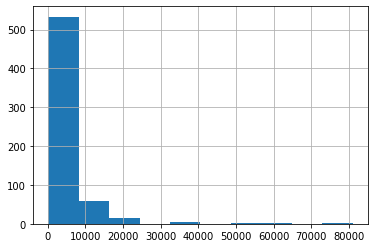

In [45]:
#histogram and boxplots for visual exploration of data with respect to different attributes
dtset['ApplicantIncome'].hist()

<AxesSubplot:>

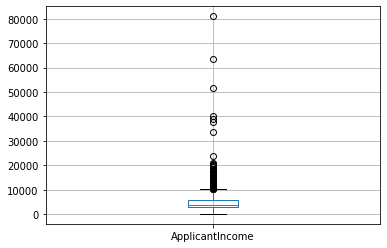

In [46]:
dtset.boxplot(column= 'ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

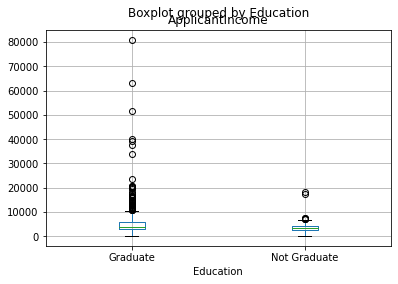

In [47]:
dtset.boxplot(column= 'ApplicantIncome' , by = 'Education')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Property_Area'>

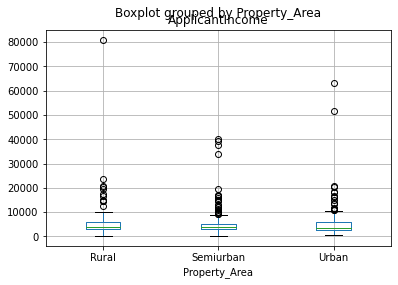

In [48]:
dtset.boxplot(column= 'ApplicantIncome' , by = 'Property_Area')

<AxesSubplot:>

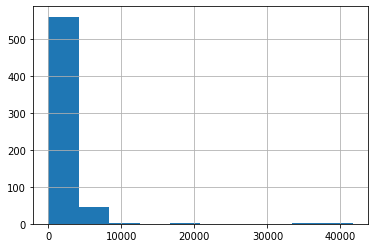

In [49]:
dtset['CoapplicantIncome'].hist()

<AxesSubplot:>

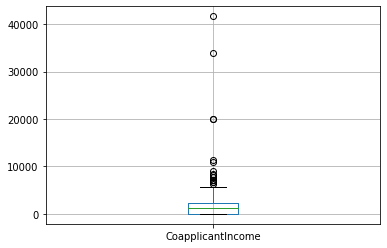

In [50]:
dtset.boxplot(column= 'CoapplicantIncome')

<AxesSubplot:>

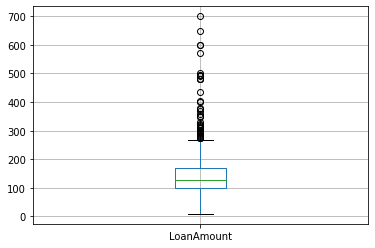

In [51]:
dtset.boxplot(column= 'LoanAmount')



<AxesSubplot:>

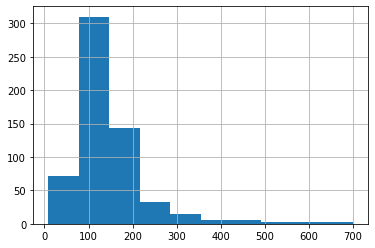

In [52]:
dtset['LoanAmount'].hist()


<AxesSubplot:>

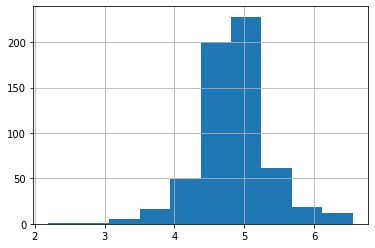

In [53]:
#normalising the loan amount with log function
dtset['LnAmtLog']= np.log(dtset['LoanAmount'])
dtset['LnAmtLog'].hist()

In [54]:
dtset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LnAmtLog             22
dtype: int64

In [55]:
#handling missing values 
dtset['Gender'].fillna(dtset['Gender'].mode()[0],inplace=True)
dtset['Married'].fillna(dtset['Married'].mode()[0],inplace=True)
dtset['Dependents'].fillna(dtset['Dependents'].mode()[0],inplace=True)
dtset['Self_Employed'].fillna(dtset['Self_Employed'].mode()[0],inplace=True)
dtset['Credit_History'].fillna(dtset['Credit_History'].mode()[0],inplace=True)
dtset['Loan_Amount_Term'].fillna(dtset['Loan_Amount_Term'].mode()[0],inplace=True)

In [56]:
dtset.LoanAmount=dtset.LoanAmount.fillna(dtset.LoanAmount.mean())
dtset.LnAmtLog=dtset.LnAmtLog.fillna(dtset.LnAmtLog.mean())

In [57]:
dtset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LnAmtLog             0
dtype: int64

In [58]:
#finding total income
dtset['TotIncm']= dtset['ApplicantIncome']+dtset['CoapplicantIncome']
dtset['TotInc_Lg']= np.log(dtset['TotIncm'])

<AxesSubplot:>

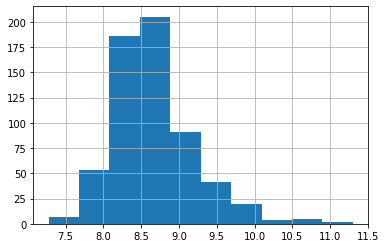

In [59]:
dtset['TotInc_Lg'].hist()

In [60]:
dtset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LnAmtLog,TotIncm,TotInc_Lg
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [61]:
#label encoding for categorical columns to numerical
dtset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1}},inplace=True)
dtset= dtset.replace(to_replace='3+',value =4)
dtset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LnAmtLog,TotIncm,TotInc_Lg
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [62]:
#setting variables X and Y for data split
X = dtset.iloc[:,np.r_[1:5,9:11,13:15]].values
y = dtset.iloc[:,12].values
print(X)

[[1 0 '0' ... 1.0 4.857444178729352 5849.0]
 [1 1 '1' ... 1.0 4.852030263919617 6091.0]
 [1 1 '0' ... 1.0 4.189654742026425 3000.0]
 ...
 [1 1 '1' ... 1.0 5.53338948872752 8312.0]
 [1 1 '2' ... 1.0 5.231108616854587 7583.0]
 [0 0 '0' ... 0.0 4.890349128221754 4583.0]]


In [63]:
y


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [64]:
#splitting the test and train data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
x_train

array([[1, 1, '0', ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, '1', ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 4, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, '0', ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, '0', ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [66]:
#scaling the data 

from sklearn.preprocessing import StandardScaler

SS= StandardScaler()
x_train= SS.fit_transform(x_train)
x_test= SS.fit_transform(x_test)


In [67]:
from sklearn.model_selection import cross_val_score
# define classify function
def classify(model,X,y):
    x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    model.fit(x_train,y_train)
    print('Accuracy is ', model.score(x_test,y_test)*100)
    #cross_validation basically used for better validation of model
    score = cross_val_score(model,X,y,cv=5)
    print('cross_validation ', np.mean(score)*100)

In [68]:
#Using decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is  66.66666666666666
cross_validation  69.54551512728241


In [69]:
#Using NaiveBayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model,X,y)

Accuracy is  83.73983739837398
cross_validation  79.97201119552179


In [73]:
#Making Prediction of y_test from x_test after training the model
model.fit(x_test, y_test)
y_pred = model.predict(x_test)
print(y_pred)


[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 0 1]
